# Basics

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('coding_round_data.csv')
data.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


- This data set contains transactions occurring in an online store (E-commerce).

- Out of the 12,330 customer samples in the dataset, 84.5% (10,422) were negative class samples (i.e. customers who did not end up buying the product), and the rest (1908) were positive class samples (i.e. customers who ended up buying).
- The dataset consists of 10 numerical and 8 categorical attributes.

- The 'Revenue' attribute can be used as the class label.

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

Bounce Rate: The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
Exit Rate: The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

- Page Value: The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

- Special Day: The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [3]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64


Numerical Data

Admin, Informational, Product Related + Durations

Bounce and Exit Rates

Page Values - mostly 0, so may be dropped?

Special Day



Categorical Data

Month - 12
OS - 8
Browser - 13
Region - 9
Traffic - 20
Visitor - 3
Weekend - 2



Therefore One hot encoding produces a rather sparse matrix

# EDA

In [6]:
from matplotlib import pyplot as plt

In [15]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [17]:
data.skew(axis = 0)

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [18]:
data.kurt( axis = 0)

Administrative               4.701146
Administrative_Duration     50.556739
Informational               26.932266
Informational_Duration      76.316853
ProductRelated              31.211707
ProductRelated_Duration    137.174164
BounceRates                  7.723159
ExitRates                    4.017035
PageValues                  65.635694
SpecialDay                   9.913659
OperatingSystems            10.456843
Browser                     12.746733
Region                      -0.148680
TrafficType                  3.479711
Weekend                     -0.397404
Revenue                      1.646493
dtype: float64

array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>,
        <AxesSubplot:title={'center':'Browser'}>],
       [<AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

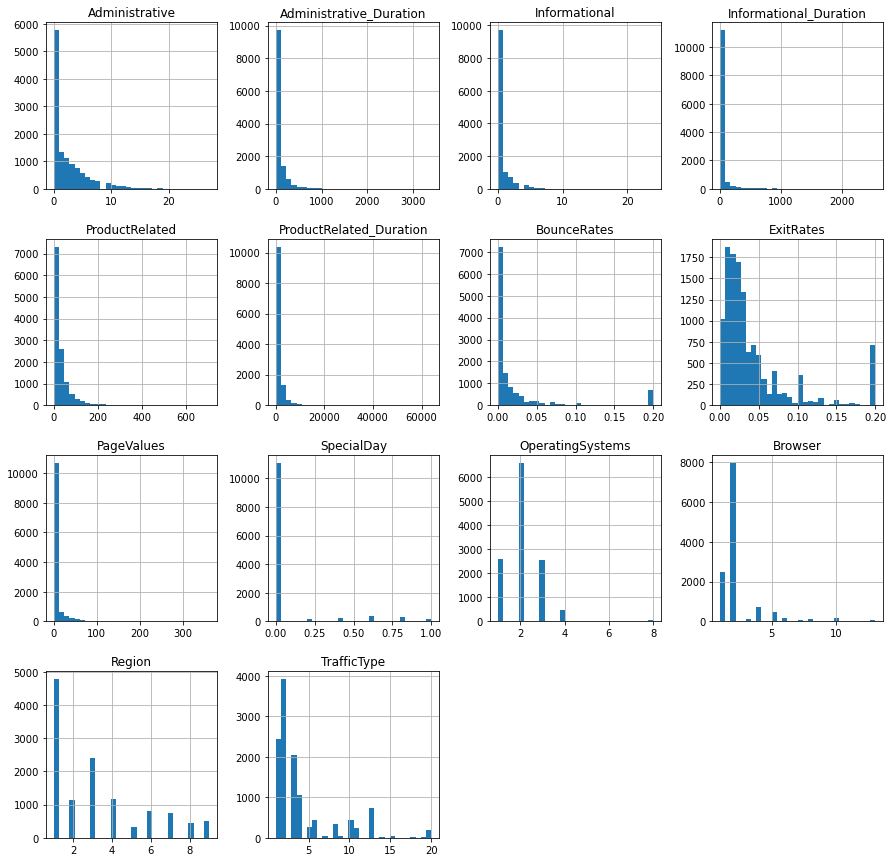

In [19]:
data.hist(figsize = (15,15), bins = 30)

Most attributes are skewed to the right, so may cause problems with normalisation.
However data is also heavily imbalanced so mayneed stratified training/validation split.

array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>,
        <AxesSubplot:title={'center':'Browser'}>],
       [<AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

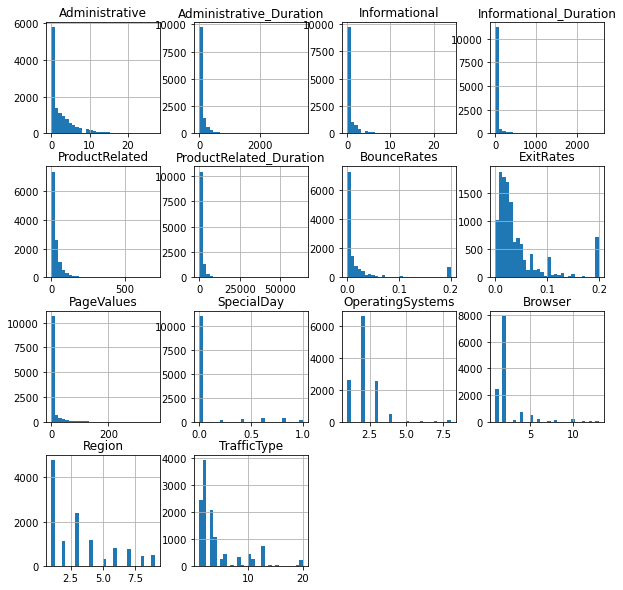

In [12]:
data.hist(figsize = (10,10), bins = 30)

In [13]:
# Splitting into positive and negative purchase dataframes to try to investigate 
# similarities/differences in features
mask = data['Revenue'] == 0
data_neg = data[mask]
data_pos = data[~mask]


(array([[205.,  62.,  33.,  10.,   3.,   4.,   2.],
        [387., 235., 105.,  51.,  33.,   9.,  15.]]),
 array([ 20,  40,  60,  80, 100, 120, 140, 200]),
 <a list of 2 BarContainer objects>)

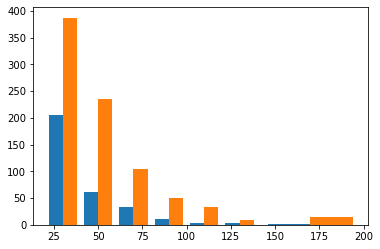

In [34]:
# Interestingly PageValues higher than 0 are more indicative of positive purchase class (orange)
plt.hist([data_neg['PageValues'], data_pos['PageValues']], bins = [20,40,60,80,100,120,140, 200])

Administrative


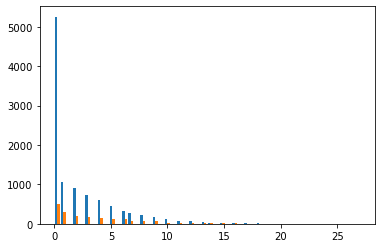

Administrative_Duration


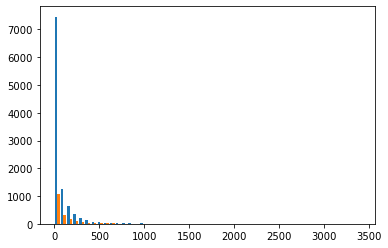

Informational


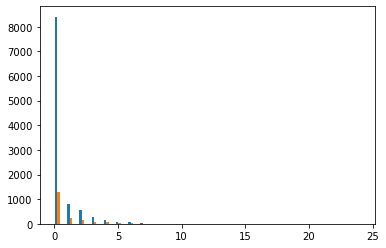

Informational_Duration


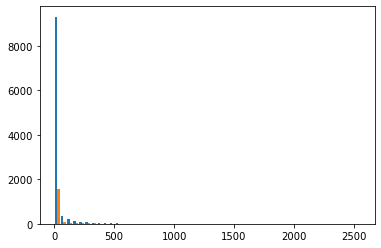

ProductRelated


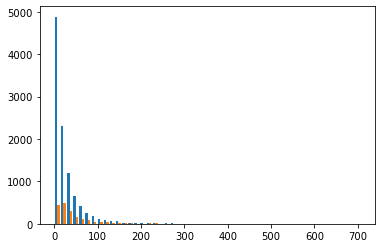

ProductRelated_Duration


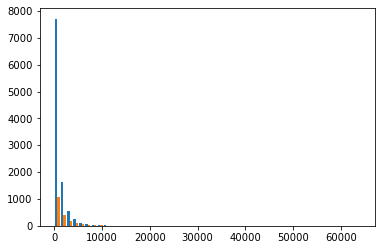

BounceRates


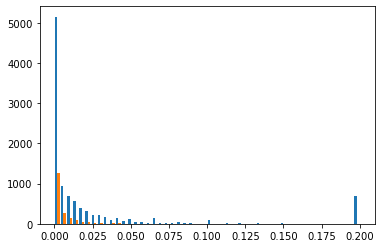

ExitRates


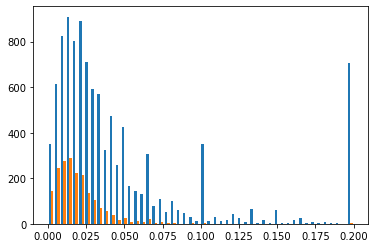

PageValues


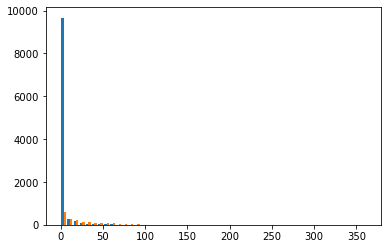

SpecialDay


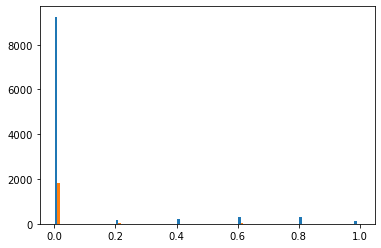

Month


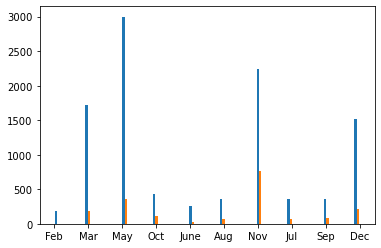

OperatingSystems


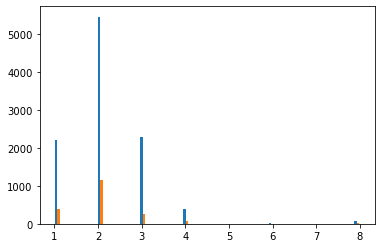

Browser


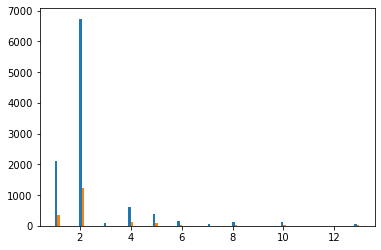

Region


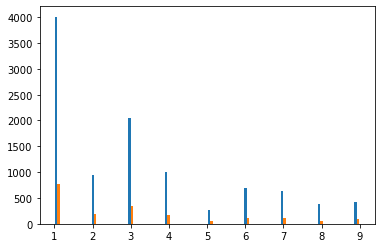

TrafficType


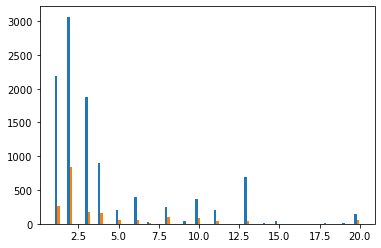

VisitorType


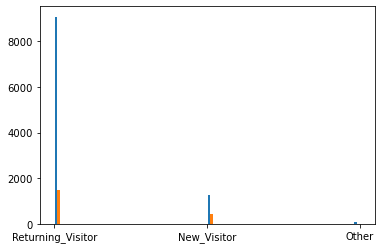

Weekend


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


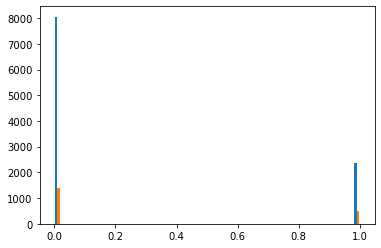

In [20]:
for i in range(0, data.shape[1] - 1):
    print(data.columns[i])
    plt.figure()
    plt.hist([
        data_neg.iloc[:,i], data_pos.iloc[:,i]
    ], bins = 50)
    plt.show()
    

Even though there is an imbalance in data, it seems that the data is distributed somewhat similarly at a glance.
Let's check for outliers in both positive and negative cases.

(0.0, 40000.0)

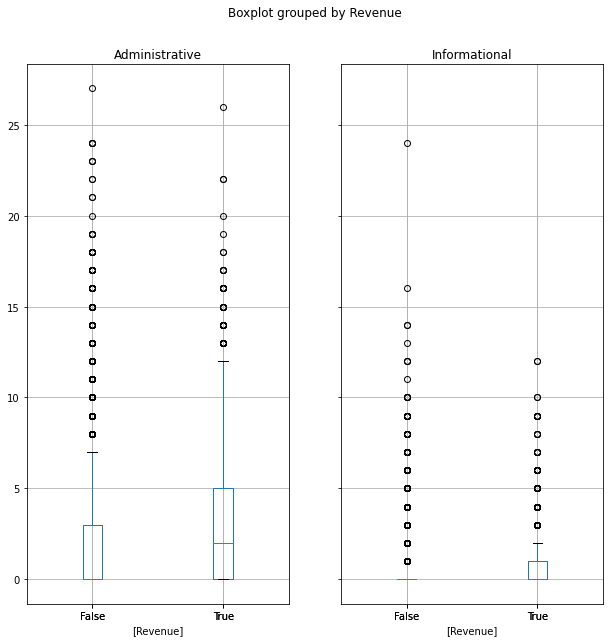

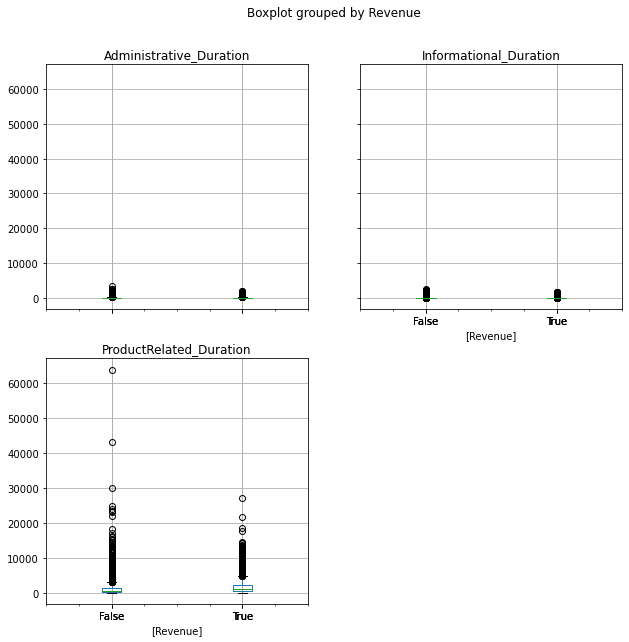

In [54]:
data.loc[:,('Administrative', 'Informational','Revenue')].boxplot(figsize = (10,10),by = "Revenue")

array([<AxesSubplot:title={'center':'Administrative_Duration'}, xlabel='[Revenue]'>,
       <AxesSubplot:title={'center':'Informational_Duration'}, xlabel='[Revenue]'>],
      dtype=object)

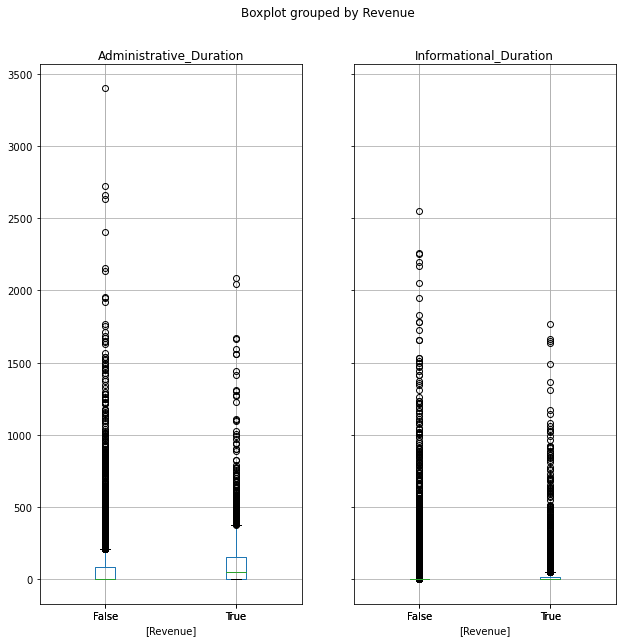

In [59]:
data.loc[:,('Administrative_Duration', 'Informational_Duration','Revenue')].boxplot(figsize = (10,10),by = "Revenue")


From comparing the succesful and other purchases it seems that there is some meaningful differences, especially in attributes such a Month (more purchases in November).

In [22]:
# Select numerical only features for correlations
num_feat = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
            'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

In [24]:
data[num_feat].corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000


As expected, some correlation between visits and durations, 
but nothing that would imply we can remove some features due to redundancy

# Cleaning

There are thankfully no missing values and most of data seems to be consistent. We need to scale the data better so Machine Learning Algorithms perform better. Since the data has right skewness across both classes and we have plenty of data, it is better to check for Normal Distribution, and for Log Normal Distribution

In [65]:
# Use shapiro-wilks test for normality
from scipy.stats import shapiro
for i in num_feat:
    result = shapiro(data.loc[:,i])
    print(result[1]>0.05)

False
False
False
False
False
False
False
False
False


Data not normally distributed, so try log transformation followed by shapiro test for log normality.

In [67]:
for i in num_feat:
    # Add small value (1) to everything to avoid log(0) errors
    result = shapiro(np.log(data.loc[:,i] + 1))
    print(result[1]>0.05)

False
False
False
False
False
False
False
False
False


So data is not log normal, hence for transformation just Normalize numerical features. Categorical features will be one hot encoded.

In [72]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [74]:
# Splitting data into attributes and target

X = data.iloc[:,:-1]
# Y is already bool dtype
Y = data.iloc[:,-1]

In [75]:

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
# Subsetting columns
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
# Selecting transformations
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [76]:
# Associating trasnfroemrs with respective features
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

With pipeline built it is time for modeling

# Modeling

My approach is to go from more interpretable models to ones with higher predictive power. We will start with logistic Regression as it is a good baseline.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Baseline model, data is piped into it
model1 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, fit_intercept = True))

In [80]:
# Splitting data into train and validation sets
# Random state for results reproducibility
X_train, X_val, Y_train, Y_val = train_test_split(X, Y,random_state = 237, stratify = Y)

In [82]:
model1.fit(X_train, Y_train)
model1.score(X_val, Y_val)

0.882906260136231

Pretty good result, let's try a cross validation to ensure it generalizes well.

In [94]:
# Making use of stratified K-fold to keep imbalances in data
from sklearn.model_selection import StratifiedKFold, cross_val_score


scv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 237)
score = cross_val_score(model1, X, Y)

In [97]:
score.mean()

0.8824006488240064

Model seems to generalize well, score of 88% seems reasonable

In [105]:
feature_weights = pd.DataFrame(model1[1].coef_)

Logistic Regression is performing pretty good, so let's try slightly changing parameters of Logstic Regression which is aimed at imbalanced classes.

In [115]:
model2 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, fit_intercept = True, class_weight = 'Balanced'))

In [117]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y,random_state = 237, stratify = Y)
model2.fit(X_train, Y_train)
model2.score(X_val, Y_val)

0.8819331819656179

In [119]:
scv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 237)
score = cross_val_score(model2, X, Y)
score.mean()

0.8824006488240064

Similar results, seems a little strange. Let's try using a more powerful method of Random Forests, which can help to tackle the issue of imbalance in datasets and help to identify most important features

In [123]:
from sklearn.ensemble import RandomForestClassifier

model3 = make_pipeline(preprocessor, RandomForestClassifier(class_weight = 'balanced'))
model3.fit(X_train, Y_train)
model3.score(X_val, Y_val)

0.9020434641582874

In [124]:
score = cross_val_score(model3, X, Y)
score.mean()

0.8959448499594485

Already a slight accuracy increase, let's do more hyperparameter tuning using random search and gridsearch.

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    'randomforestclassifier__n_estimators':[1,10,100,1000],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__min_samples_split': [2,3,4,5],
    'randomforestclassifier__max_depth': [2,5,8,10],
    'randomforestclassifier__max_features':['auto','sqrt']
}


rv = RandomizedSearchCV(model3,param_distributions = parameters, cv = 5, verbose = 2, n_iter = 20)

rv.fit(X_train,Y_train)
rv.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=10; total time=   0.0s
[C

[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100; total time=   0.5s
[CV] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV] END randomforestclassifier__criterion=gini, randomf

[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100; total time=   0.7s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100; total time=   0.7s
[CV] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=auto, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=100; total time=   0.8s
[CV] END randomforestclassifier__criterion=e

{'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__criterion': 'gini'}

In [142]:
# Grid Search over smaller intervals
parameters = {
    'randomforestclassifier__n_estimators':[150,180,200],
    'randomforestclassifier__min_samples_split': [2],
    'randomforestclassifier__max_depth': [15,18],
}


gd = GridSearchCV(model3,param_grid = parameters, cv = 5, verbose = 2)

gd.fit(X_train,Y_train)
gd.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150; total time=   1.4s
[CV] END randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150; total time=   1.4s
[CV] END randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150; total time=   1.4s
[CV] END randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150; total time=   1.3s
[CV] END randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=150; total time=   1.3s
[CV] END randomforestclassifier__max_depth=15, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=180; total time=   1.4s
[CV] END randomforestc

{'randomforestclassifier__max_depth': 18,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 180}

In [144]:
model3 = make_pipeline(preprocessor, 
                       RandomForestClassifier(class_weight = 'balanced',
                                              max_depth = 18, max_features = 'auto',
                                              min_samples_split = 2,criterion = 'gini', n_estimators = 180))
model3.fit(X_train, Y_train)
model3.score(X_val, Y_val)

0.9036652611093091

In [174]:
score = cross_val_score(model3, X, Y)
score.mean()

0.8940794809407947

In [147]:
model3[1].feature_importances

array([4.03640903e-03, 5.82080012e-03, 4.78500180e-04, 3.31441915e-03,
       2.16656818e-03, 7.82440015e-03, 1.26322295e-02, 2.99063251e-02,
       4.69836853e-03, 4.98249375e-03, 7.59545012e-03, 2.18668674e-04,
       8.06146071e-03, 4.00847535e-02, 4.71468795e-02, 1.39015512e-02,
       2.07322443e-02, 6.33176854e-02, 8.15994083e-02, 5.46789934e-02,
       9.68614799e-02, 3.92217214e-01, 4.71977319e-03, 1.62280146e-02,
       1.52954157e-02, 2.47582288e-02, 2.79910783e-02, 8.73118696e-03])

Most important features seem to be product-related duration, month, regions of a user and their traffic

Lastly I would like to try building a neural simple neural network to try to improve on the accuracy of random forest. 

In [170]:
from sklearn.neural_network import MLPClassifier
model4 = make_pipeline(preprocessor, 
                       MLPClassifier(hidden_layer_sizes = (100, 50, 10), learning_rate = 'adaptive',
                                     activation = 'relu',max_iter = 600))

In [171]:
model4.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month', 'VisitorType']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'Speci

In [173]:
model4.score(X_val, Y_val)

0.8644177748945832

In [ ]:
score = cross_val_score(model4, X, Y)
score.mean()

I think that due to the imbalance in data, random forest is the best model due to its easy to interpret nature and good accuracy.